<a href="https://colab.research.google.com/github/Ashwanth-G/Stock-Forecasting-with-LSTMs/blob/main/CCP_Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
import pandas as pd

df = pd.read_csv('Google.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730975,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044
...,...,...,...,...,...,...,...
4529,2022-08-16,121.519997,122.430000,120.639999,121.699997,121.399399,19041200
4530,2022-08-17,120.120003,121.290001,119.379997,119.550003,119.254715,22847000
4531,2022-08-18,119.430000,120.820000,118.720001,120.169998,119.873177,17987700
4532,2022-08-19,119.059998,119.150002,116.760002,117.209999,116.920486,21809500


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2004-08-19,2.511011
1,2004-08-20,2.710460
2,2004-08-23,2.737738
3,2004-08-24,2.624374
4,2004-08-25,2.652653
...,...,...
4529,2022-08-16,121.699997
4530,2022-08-17,119.550003
4531,2022-08-18,120.169998
4532,2022-08-19,117.209999


In [ ]:
df['Date']

,Date
0,2004-08-19
1,2004-08-20
2,2004-08-23
3,2004-08-24
4,2004-08-25
...,...
4529,2022-08-16
4530,2022-08-17
4531,2022-08-18
4532,2022-08-19


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2004-08-19,2.511011
1,2004-08-20,2.710460
2,2004-08-23,2.737738
3,2004-08-24,2.624374
4,2004-08-25,2.652653
...,...,...
4529,2022-08-16,121.699997
4530,2022-08-17,119.550003
4531,2022-08-18,120.169998
4532,2022-08-19,117.209999


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-5-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,2004-08-19
1,2004-08-20
2,2004-08-23
3,2004-08-24
4,2004-08-25
...,...
4529,2022-08-16
4530,2022-08-17
4531,2022-08-18
4532,2022-08-19


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2004-08-19,2.511011
2004-08-20,2.710460
2004-08-23,2.737738
2004-08-24,2.624374
2004-08-25,2.652653
...,...
2022-08-16,121.699997
2022-08-17,119.550003
2022-08-18,120.169998


In [ ]:
import matplotlib.pyplot as plt



In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,101.534500,102.066498,101.626503,101.623001
1,2021-03-26,102.066498,101.626503,101.623001,101.236504
2,2021-03-29,101.626503,101.623001,101.236504,102.289497
3,2021-03-30,101.623001,101.236504,102.289497,102.323502
4,2021-03-31,101.236504,102.289497,102.323502,103.125999
...,...,...,...,...,...
247,2022-03-17,125.950996,129.197998,133.280502,133.839005
248,2022-03-18,129.197998,133.280502,133.839005,136.125504
249,2022-03-21,133.280502,133.839005,136.125504,136.101501
250,2022-03-22,133.839005,136.125504,136.101501,139.867996


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

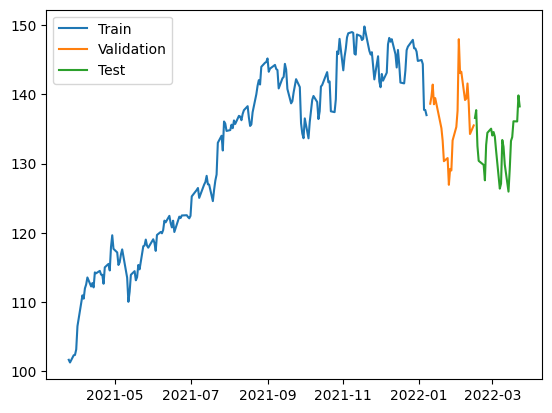

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 17566.8594 - mean_absolute_error: 131.8294 - val_loss: 18580.5957 - val_mean_absolute_error: 136.2194
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17460.0762 - mean_absolute_error: 131.4856 - val_loss: 18411.7129 - val_mean_absolute_error: 135.5981
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17105.6719 - mean_absolute_error: 130.1198 - val_loss: 18197.6719 - val_mean_absolute_error: 134.8065
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17052.7012 - mean_absolute_error: 129.9167 - val_loss: 17934.8242 - val_mean_absolute_error: 133.8280
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16757.8867 - mean_absolute_error: 128.7757 - val_loss: 17605.1484 - val_mean_absolute_error: 132.5905
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16313.4434 - mean_absolute_error: 127.0613 - val_loss: 17176.0742 - val_mean_absolute_error: 130.9623
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


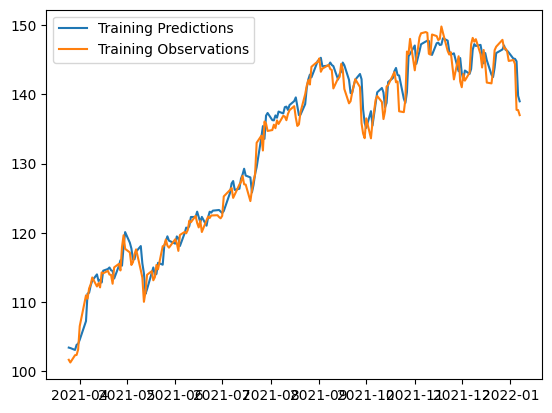

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


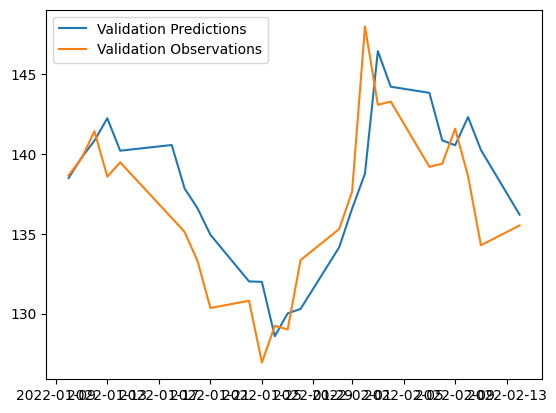

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


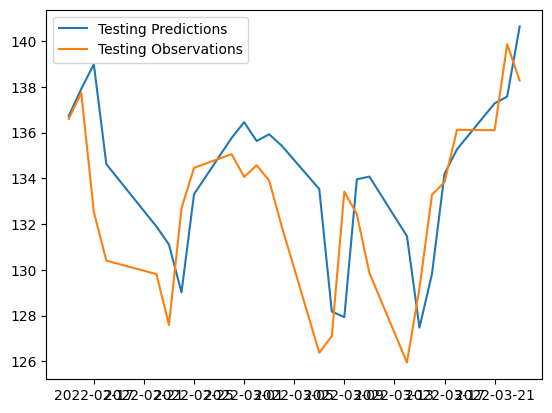

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

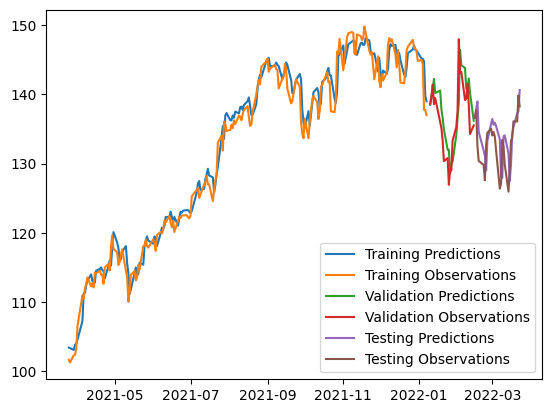

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━

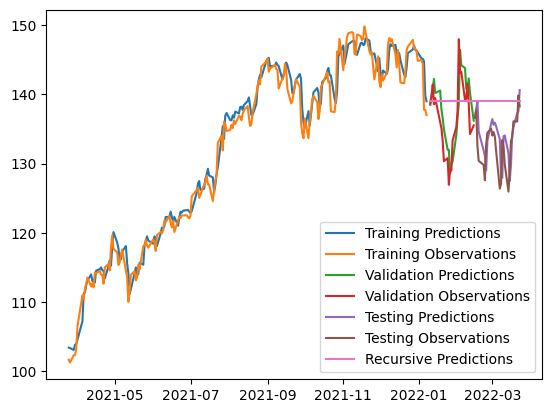

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


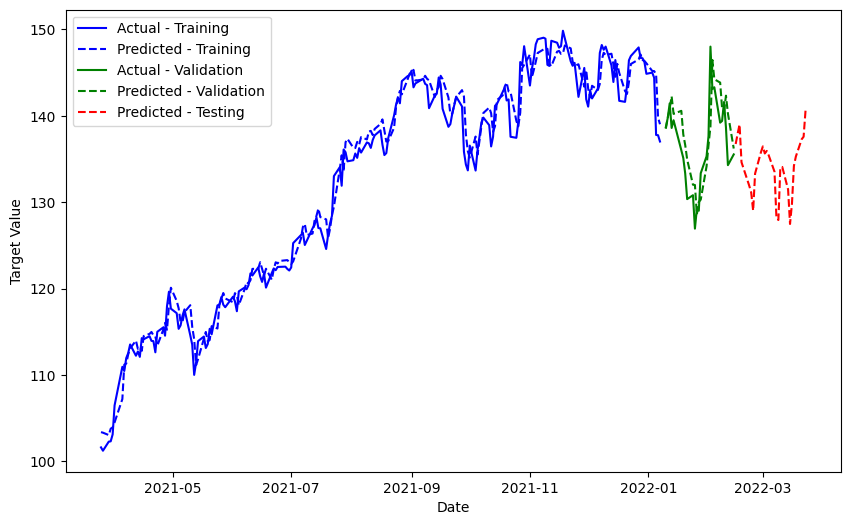

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10,6))

# Plot actual vs predicted for training data
plt.plot(dates_train, y_train, label='Actual - Training', color='blue')
plt.plot(dates_train, model.predict(X_train).flatten(), label='Predicted - Training', linestyle='dashed', color='blue')

# Plot actual vs predicted for validation data
plt.plot(dates_val, y_val, label='Actual - Validation', color='green')
plt.plot(dates_val, model.predict(X_val).flatten(), label='Predicted - Validation', linestyle='dashed', color='green')

# Plot only predicted for testing data
plt.plot(dates_test, model.predict(X_test).flatten(), label='Predicted - Testing', linestyle='dashed', color='red')

# Customize plot
plt.legend()
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.show()
